# Feed Forward neural network

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# To start eager execution (this must be top of code)
tf.executing_eagerly()
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus: tf.config.experimental.set_memory_growth(gpus[0], True)

In [2]:
L = tf.keras.layers

In [7]:
def toy_data():
    x = np.linspace(-2, 2, 100).reshape(-1, 1)
    a1 = -3
    a2 = -2
    a3 = 2
    b = 1
    y = a1*x + a2*x**2 + a3*x**3 + 3*np.random.randn(100, 1)
    return x, y

x, y = toy_data()

### Toy data
$$
\begin{align}
y &= -3x -2x^2 + 2x^3 + 3\epsilon \\
\epsilon &\sim N(0, 1)
\end{align}
$$

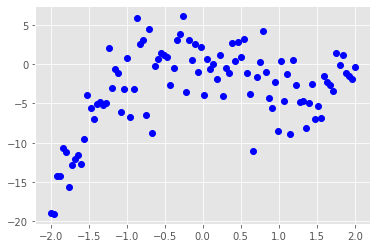

In [8]:
# polynomial
plt.plot(x, y, "bo")

In [9]:
x_train = tf.convert_to_tensor(x, dtype=tf.float32)
y_train = tf.convert_to_tensor(y, dtype=tf.float32)

In [10]:
learning_rate = 1e-4
hidden_size = 10

model_relu = tf.keras.Sequential([
    L.Dense(hidden_size, activation="relu"),
    L.Dense(hidden_size, activation="relu"),
    L.Dense(1),
])

model_tanh = tf.keras.Sequential([
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(1),
])

def loss_fn(model, x, y):
    y_ = model(x)
    return tf.keras.losses.mean_squared_error(y, y_)

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [11]:
for i in range(1000):
    # training model_relu
    with tf.GradientTape(persistent=True) as tape:
        loss_relu = loss_fn(model_relu, x_train, y_train)
        loss_tanh = loss_fn(model_tanh, x_train, y_train)
    
    grads_relu = tape.gradient(loss_relu, model_relu.variables)
    grads_tanh = tape.gradient(loss_tanh, model_tanh.variables)
    
    optimizer.apply_gradients(zip(grads_relu, model_relu.variables))
    optimizer.apply_gradients(zip(grads_tanh, model_tanh.variables))
       
    if (i + 1) % 100 == 0:
        print("epoch ", i + 1)
        print("loss_relu : {}".format(loss_relu.numpy().mean()))
        print("loss_tanh : {}".format(loss_tanh.numpy().mean()))

epoch  100
loss_relu : 12.553857803344727
loss_tanh : 19.34609031677246
epoch  200
loss_relu : 10.349559783935547
loss_tanh : 11.9027099609375
epoch  300
loss_relu : 10.135611534118652
loss_tanh : 10.041522026062012
epoch  400
loss_relu : 9.890419960021973
loss_tanh : 9.753950119018555
epoch  500
loss_relu : 9.845580101013184
loss_tanh : 9.621956825256348
epoch  600
loss_relu : 9.810282707214355
loss_tanh : 9.459753036499023
epoch  700
loss_relu : 9.75052261352539
loss_tanh : 9.212106704711914
epoch  800
loss_relu : 9.68554973602295
loss_tanh : 8.986852645874023
epoch  900
loss_relu : 9.600992202758789
loss_tanh : 8.851601600646973
epoch  1000
loss_relu : 9.486570358276367
loss_tanh : 8.782706260681152


In [12]:
y_predict_relu = model_relu(x_train).numpy()
y_predict_tanh = model_tanh(x_train).numpy()

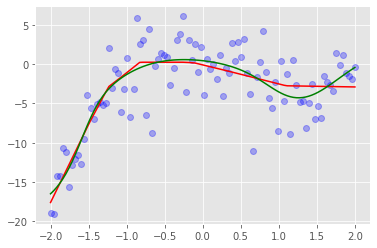

In [13]:
# polynomial data
plt.plot(x, y, "bo", alpha=0.3)
# model_relu predict
plt.plot(x, y_predict_relu, color="r")
# model_tanh predict
plt.plot(x, y_predict_tanh, color="g")